In [ ]:
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing import image

In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
train_path= '/content/drive/MyDrive/5th Semester/dataset/train'

In [80]:
test_path='/content/drive/MyDrive/5th Semester/dataset/val'

In [82]:
train_datagen = image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)
val_datagen= image.ImageDataGenerator(    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1)

In [83]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224,224),
    batch_size = 4,
    class_mode = 'binary')
validation_generator = val_datagen.flow_from_directory(
    test_path,
    target_size = (224,224),
    batch_size = 4,
    shuffle=True,
    class_mode = 'binary')

Found 8857 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [84]:
base_model = tf.keras.applications.EfficientNetB3(weights='imagenet', input_shape=(224,224,3), include_top=False)

for layer in base_model.layers:
    layer.trainable=False
model = Sequential()
model.add(base_model)
model.add(GaussianNoise(0.25))
model.add(GlobalAveragePooling2D())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(GaussianNoise(0.25))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional  (None, 7, 7, 1536)        10783535  
 )                                                               
                                                                 
 gaussian_noise_8 (Gaussian  (None, 7, 7, 1536)        0         
 Noise)                                                          
                                                                 
 global_average_pooling2d_4  (None, 1536)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_8 (Dense)             (None, 512)               786944    
                                                                 
 batch_normalization_4 (Bat  (None, 512)               2048      
 chNormalization)                                     

In [85]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy','Precision','Recall','AUC'])

In [87]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
lrp=ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=2)
filepath='best_model.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
call=[checkpoint,lrp]
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
    steps_per_epoch= 25,
    callbacks=call
    )

Epoch 1/5
25/25 [==============================] - ETA: 0s - loss: 0.8746 - accuracy: 0.6600 - precision: 0.6596 - recall: 0.6327 - auc: 0.7031
Epoch 1: val_accuracy improved from -inf to 0.56167, saving model to best_model.h5
25/25 [==============================] - 178s 7s/step - loss: 0.8746 - accuracy: 0.6600 - precision: 0.6596 - recall: 0.6327 - auc: 0.7031 - val_loss: 0.7925 - val_accuracy: 0.5617 - val_precision: 0.4681 - val_recall: 0.7042 - val_auc: 0.6144 - lr: 0.0010
Epoch 2/5
25/25 [==============================] - ETA: 0s - loss: 0.6171 - accuracy: 0.7600 - precision: 0.6596 - recall: 0.7949 - auc: 0.8142
Epoch 2: val_accuracy improved from 0.56167 to 0.65833, saving model to best_model.h5
25/25 [==============================] - 115s 5s/step - loss: 0.6171 - accuracy: 0.7600 - precision: 0.6596 - recall: 0.7949 - auc: 0.8142 - val_loss: 0.6887 - val_accuracy: 0.6583 - val_precision: 0.5614 - val_recall: 0.6667 - val_auc: 0.7103 - lr: 0.0010
Epoch 3/5
25/25 [============

In [88]:
model.evaluate(train_generator)

2215/2215 [==============================] - 2648s 1s/step - loss: 0.7095 - accuracy: 0.6535 - precision: 0.7829 - recall: 0.4148 - auc: 0.8042


[0.7094573974609375,
 0.6534944176673889,
 0.7829457521438599,
 0.41478440165519714,
 0.8042037487030029]

In [89]:
model.evaluate(validation_generator)

150/150 [==============================] - 86s 570ms/step - loss: 0.6078 - accuracy: 0.6850 - precision: 0.6085 - recall: 0.5958 - auc: 0.7643


[0.6078044176101685,
 0.6850000023841858,
 0.6085106134414673,
 0.5958333611488342,
 0.764334499835968]

1/1 [==============================] - 3s 3s/step
[[0.39219332]]
THE UPLOADED X-RAY IMAGE IS: Fracture


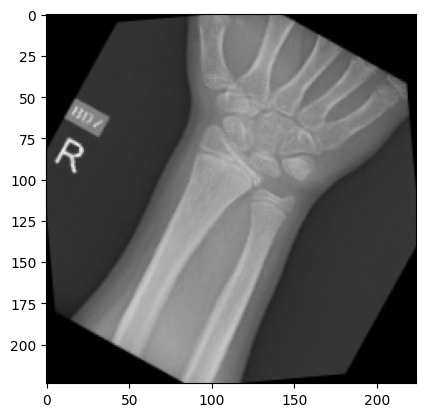

In [90]:
from tensorflow.keras.utils import load_img, img_to_array
img = load_img('/content/drive/MyDrive/5th Semester/dataset/val/not fractured/1-rotated2-rotated3-rotated1.jpg',target_size=(224,224))
imag = img_to_array(img)
imaga = np.expand_dims(imag,axis=0)
ypred = model.predict(imaga)
print(ypred)
a=ypred[0]
if a<0.5:
      op="Fracture"
else:
      op="Normal"
plt.imshow(img)
print("THE UPLOADED X-RAY IMAGE IS: "+str(op))